Intership 1, classify object using CNN and Transformer
* Họ tên: Võ Minh Tùng
* MSHV: 2370345

In [ ]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist

Download data

In [ ]:
fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

train data and test data

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

show train label

In [ ]:
print(train_labels)

[9 0 0 ... 3 0 5]


define class name

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Display format of train image

In [ ]:
print(train_images.shape)

(60000, 28, 28)


display test image

In [ ]:
print(test_images.shape)

(10000, 28, 28)


inspect a random training sample

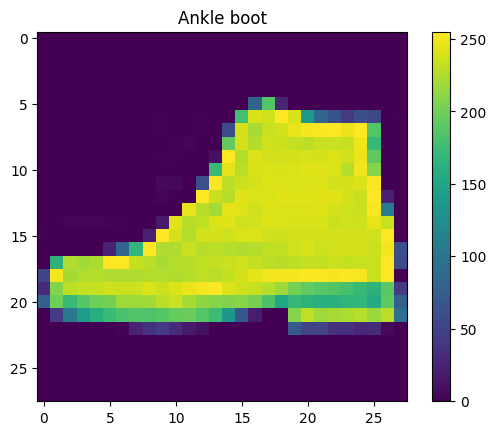

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_images[42])
plt.colorbar()
plt.grid(False)
plt.title(class_names[train_labels[42]])
plt.show()

the pixel values are in the range of 0 to 255. Hence, we need to rescale the data to a range of 0 to 1 before feeding it to the neural network

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

display the first 16 training samples after the preprocessing,

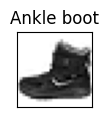

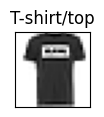

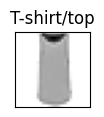

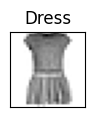

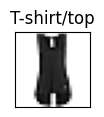

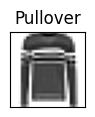

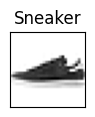

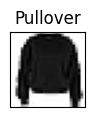

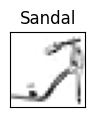

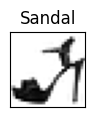

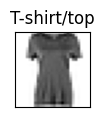

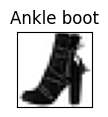

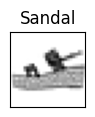

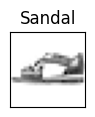

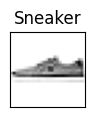

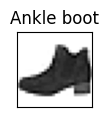

In [ ]:
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.subplots_adjust(hspace=.3)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[i]])
    plt.show()

# Classifying clothing images with CNNs

Architecting the CNN model

In [ ]:
X_train = train_images.reshape((train_images.shape[0], 28, 28, 1))

Test data

In [ ]:
X_test = test_images.reshape((test_images.shape[0], 28, 28, 1))

display train information

In [ ]:
print(X_train.shape)

(60000, 28, 28, 1)


In [ ]:
print(X_test.shape)

(10000, 28, 28, 1)


the CNN model, let's specify the random seed in TensorFlow for
reproducibility

In [ ]:
tf.random.set_seed(42)

initialize a Keras-based
model

In [ ]:
from tensorflow.keras import datasets, layers, models, losses
model = models.Sequential()

3.1 Configure convolutional layer with 32 small-sized 3 * 3 filters
Note that we use ReLU as the activation function.

In [ ]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


add max-pooling layer with a 2 * 2 filter

In [ ]:
model.add(layers.MaxPooling2D((2, 2)))

3.2 the second convolutional layer. It has 64 3 * 3 filters and comes with a
ReLU activation function

In [ ]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

add another max pooling layer with 2*2

In [ ]:
model.add(layers.MaxPooling2D((2, 2)))

Add the third convolutional layer

In [ ]:
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

Flatten result feature map

In [ ]:
model.add(layers.Flatten())

Classifier backend, one hiddenlayer with 64 node
The hidden layer here is the regular fully-connected dense layer, with ReLU as the activation function

In [ ]:
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Compile model with Adam as optimizer, cross entropy as the loss function and classification accuracy as the metric

In [ ]:
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

Summary

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 167,114 (652.79 KB)

 Trainable params: 167,114 (652.79 KB)

 Non-trainable params: 0 (0.00 B)

Fitting the CNN model

In [ ]:
model.fit(X_train, train_labels, validation_data=(X_test, test_labels), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 36ms/step - accuracy: 0.7420 - loss: 0.7054 - val_accuracy: 0.8746 - val_loss: 0.3552
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 37ms/step - accuracy: 0.8759 - loss: 0.3360 - val_accuracy: 0.8902 - val_loss: 0.3154
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 36ms/step - accuracy: 0.8959 - loss: 0.2808 - val_accuracy: 0.8992 - val_loss: 0.2903
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.9087 - loss: 0.2431 - val_accuracy: 0.9025 - val_loss: 0.2761
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 39ms/step - accuracy: 0.9207 - loss: 0.2139 - val_accuracy: 0.9038 - val_loss: 0.2810
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - accuracy: 0.9303 - loss: 0.1895 - val_accuracy: 0.9027 - val_loss: 0.2854
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 37ms/step - accuracy: 0.9385 - loss: 0.1685 - val_accuracy: 0.9031 - val_loss: 0.3026
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.9451 -

Evaluate model

In [ ]:
test_loss, test_acc = model.evaluate(X_test, test_labels, verbose=2)
print('accuracy on test set:', test_acc)

313/313 - 3s - 9ms/step - accuracy: 0.1000 - loss: 4.1589
accuracy on test set: 0.10000000149011612
